# Lab 1 - DNA analysis through Python

Processing file: dna_raw.txt
Nucleotide counts for SEQ1 (from dna_raw.txt):
{'A': 17, 'C': 8, 'G': 2, 'T': 7}


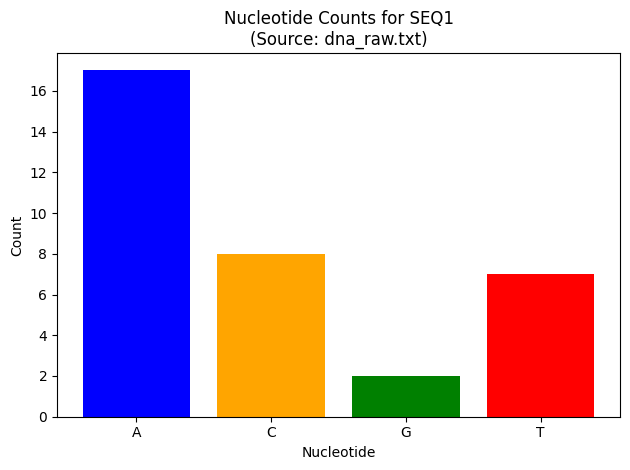

Nucleotide counts for SEQ2 (from dna_raw.txt):
{'A': 3, 'C': 4, 'G': 10, 'T': 7}


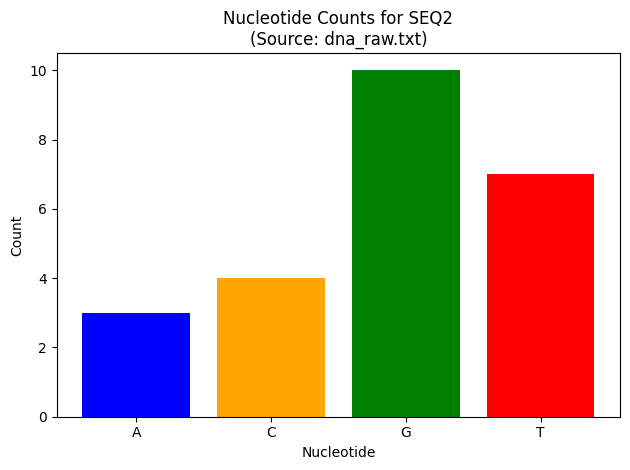

Nucleotide counts for SEQ3 (from dna_raw.txt):
{'A': 18, 'C': 16, 'G': 16, 'T': 10}


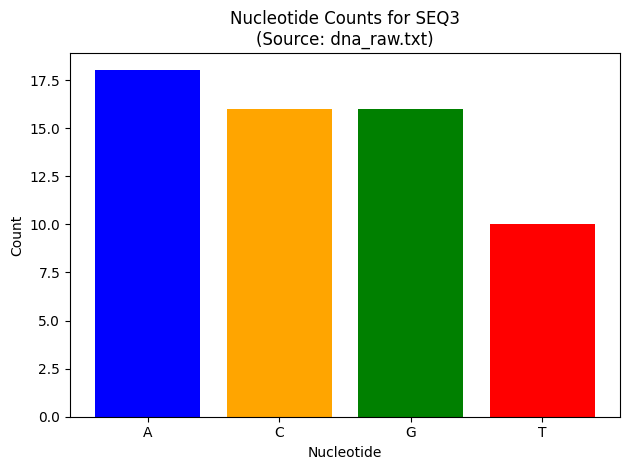

Nucleotide counts for SEQ4 (from dna_raw.txt):
{'A': 13, 'C': 11, 'G': 18, 'T': 10}


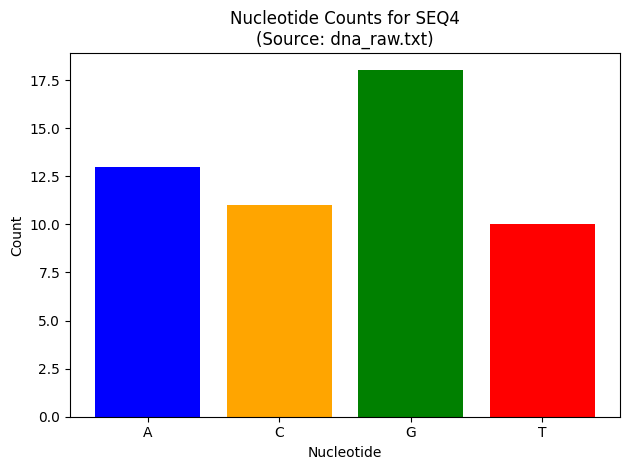

Processing file: dna_raw_complicated.txt
Nucleotide counts for SEQ1 (from dna_raw_complicated.txt):
{'A': 17, 'C': 8, 'G': 2, 'T': 7}


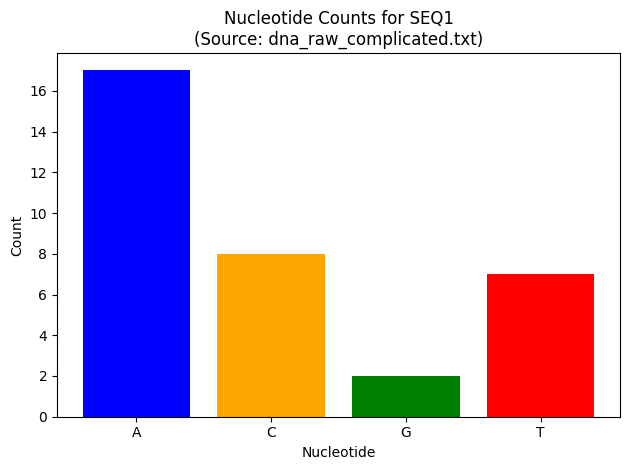

Nucleotide counts for SEQ2 (from dna_raw_complicated.txt):
{'A': 3, 'C': 4, 'G': 10, 'T': 7}


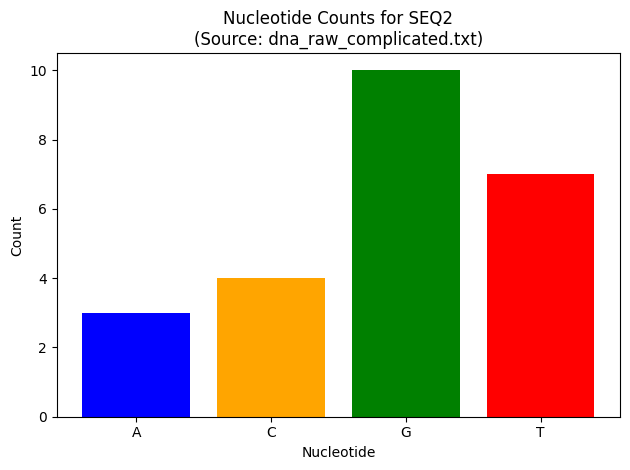

Nucleotide counts for SEQ3 (from dna_raw_complicated.txt):
{'A': 36, 'C': 34, 'G': 21, 'T': 19}


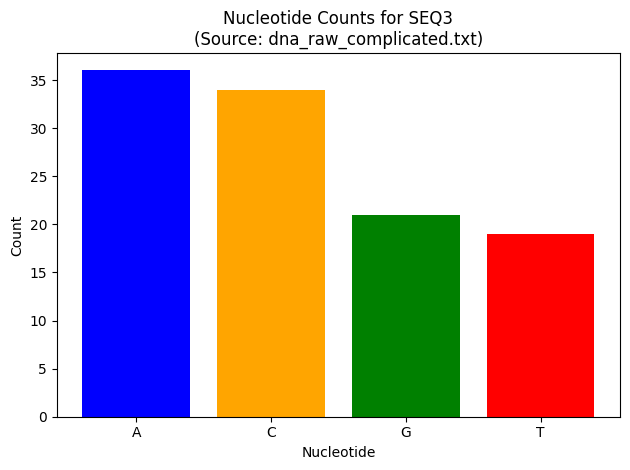

Nucleotide counts for SEQ4 (from dna_raw_complicated.txt):
{'A': 17, 'C': 15, 'G': 20, 'T': 12}


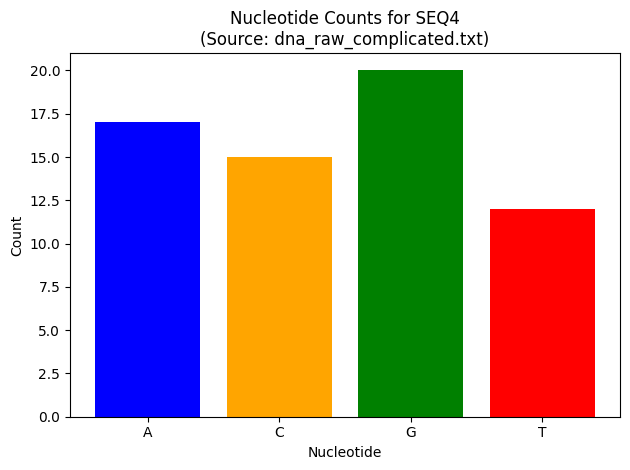

In [4]:
import matplotlib.pyplot as plt  # I will use pyplot to visualize the results

def read_dna_file(filename):
    # function to read the DNA file making filename a parameter and being reusable
    dna_data = {}  # my dictionary to store the data
    seq_id = ""  # create an empty string to hold the sequence ID
    dna = ""  # create an empty string to hold the DNA sequence

    try:
        with open(filename, "r") as txt_file:  # open the dna file safely in read mode with the with statement
            for line in txt_file:  # iterate through the lines in the file
                line = line.strip().upper()  # remove whitespace characters from the beginning and end of the line and convert to uppercase
                if line.startswith(">"):  # if the line starts with ">", it is a sequence ID (seq_id)
                    if seq_id:  # if seq_id is not empty
                        dna_data[seq_id] = dna  # store the previous sequence in the dna_data dictionary
                    seq_id = line[1:]  # update seq_id to start after ">" making it correct
                    dna = ""  # reset the dna string for the new sequence
                else:
                    dna += line  # add the line directly to the dna string (instead of using join())
            if seq_id != "":  # after the loop, check if there is a last sequence to add
                dna_data[seq_id] = dna  # store the last sequence in the dna_data dictionary
    except FileNotFoundError:
        print(f"Error: The file '{filename}' could not be found.")  # error message if file is missing
        return {}

    return dna_data  # return the dictionary containing all sequences in the txt_file

def count_letters(dna_sequence):
    # function to count the letters in the DNA sequences
    letter_count = {"A": 0, "C": 0, "G": 0, "T": 0}  # create a dictionary to hold the counts of each letter
    for letter in dna_sequence:  # iterate through each letter in the DNA sequence
        if letter in letter_count:  # if the letter is one of A, C, G, T
            letter_count[letter] += 1  # increment the count for that letter
    return letter_count  # return the dictionary with the counts of each letter

def visualize_counts(letter_count, seq_id, filename):
    # function to visualize the counts using a bar chart
    letters = list(letter_count.keys())  # get the letters (A, C, G, T) as a list
    counts = list(letter_count.values())  # get the counts as a list
    plt.bar(letters, counts, color=["blue", "orange", "green", "red"])  # create a bar chart with specified colors
    plt.xlabel("Nucleotide")  # label for the x-axis
    plt.ylabel("Count")  # label for the y-axis
    plt.title(f"Nucleotide Counts for {seq_id}\n(Source: {filename})")  # title of the chart including the sequence ID and filename
    plt.tight_layout()  # adjust layout to prevent clipping
    plt.show()  # display the bar chart

def process_dna_file(filename, max_sequences=None):
    # function to process any DNA file and visualize results
    print(f"Processing file: {filename}")  # print which file is being processed
    dna_dict = read_dna_file(filename)  # read the DNA file and store the sequences in a dictionary
    all_seq_ids = list(dna_dict.keys())  # get all sequence IDs

    if max_sequences:  # if a limit is set, slice the list
        all_seq_ids = all_seq_ids[:max_sequences]

    for seq_id in all_seq_ids:  # loop through the selected sequences
        seq = dna_dict[seq_id]  # get the actual sequence into a variable
        counts = count_letters(seq)  # count the letters
        print(f"Nucleotide counts for {seq_id} (from {filename}):")  # print the counts with filename
        print(counts)
        visualize_counts(counts, seq_id, filename)  # visualize the counts for this sequence



process_dna_file("dna_raw.txt", max_sequences=4) # process only the first 4 sequences in the simple file
process_dna_file("dna_raw_complicated.txt") # process all sequences in the complicated file